In [779]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [780]:
from sklearn.preprocessing import MinMaxScaler

In [781]:
from scipy.stats import boxcox

In [782]:
df = pd.read_csv(r"C:\Users\Manik_Bhatia\Downloads\body_measurements_dataset.csv")

In [783]:
df

,Gender,Height,Weight,Bust/Chest,Cup Size,Waist,Hips,Body Shape Index
0,Female,"5'1""",67,37,E,35,38,4
1,Male,"6'1""",85,40,NaN,30,31,3
2,Male,"5'3""",77,44,NaN,36,42,4
3,Male,"6'4""",74,38,NaN,48,49,4
4,Male,"4'11""",47,35,NaN,39,41,0
...,...,...,...,...,...,...,...,...
995,Female,"5'2""",70,40,DD,34,36,3
996,Female,"5'6""",84,47,F,36,38,0
997,Male,"6'4""",73,47,NaN,31,38,2
998,Female,"5'1""",45,34,E,25,29,1


In [784]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            1000 non-null   object
 1   Height            1000 non-null   object
 2   Weight            1000 non-null   int64 
 3   Bust/Chest        1000 non-null   int64 
 4   Cup Size          525 non-null    object
 5   Waist             1000 non-null   int64 
 6   Hips              1000 non-null   int64 
 7   Body Shape Index  1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


In [785]:
df.isnull().sum()

Gender                0
Height                0
Weight                0
Bust/Chest            0
Cup Size            475
Waist                 0
Hips                  0
Body Shape Index      0
dtype: int64

cup has null due to females and males

In [786]:
def convtheight(h):
    """feet'inches -> inches"""
    ht = h.split("'")
    ft = float(ht[0])
    inch = float(ht[1].replace("\"",""))
    return ft*12+inch


In [787]:
df['height_inch'] = df['Height'].apply(lambda x : convtheight(x))

In [788]:
df

,Gender,Height,Weight,Bust/Chest,Cup Size,Waist,Hips,Body Shape Index,height_inch
0,Female,"5'1""",67,37,E,35,38,4,61.0
1,Male,"6'1""",85,40,NaN,30,31,3,73.0
2,Male,"5'3""",77,44,NaN,36,42,4,63.0
3,Male,"6'4""",74,38,NaN,48,49,4,76.0
4,Male,"4'11""",47,35,NaN,39,41,0,59.0
...,...,...,...,...,...,...,...,...,...
995,Female,"5'2""",70,40,DD,34,36,3,62.0
996,Female,"5'6""",84,47,F,36,38,0,66.0
997,Male,"6'4""",73,47,NaN,31,38,2,76.0
998,Female,"5'1""",45,34,E,25,29,1,61.0


<Axes: xlabel='Gender', ylabel='count'>

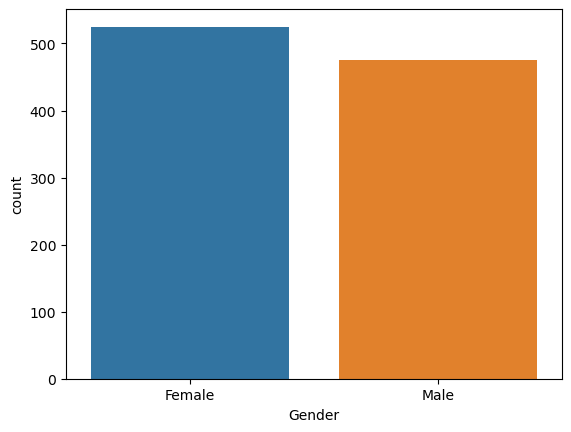

In [789]:
sns.countplot(data=df , x='Gender')

In [790]:
df['Body_shape'] = df['Body Shape Index'].map( {0: 'Standard/Rectangle' , 
                                                1: 'Apple' , 
                                                2: 'Pear', 
                                                3: 'Hour Glass' , 
                                                4: 'Inverted Triangle' })

<Axes: xlabel='Body_shape', ylabel='count'>

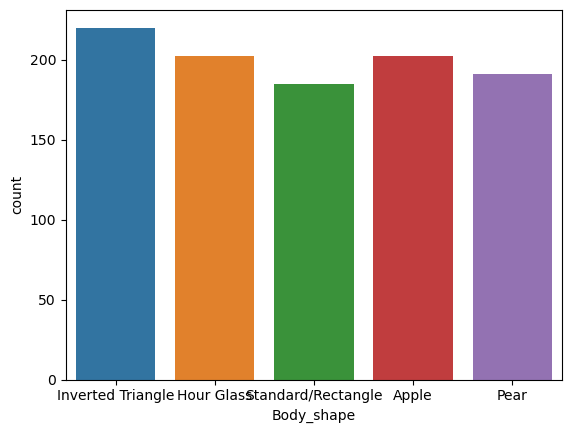

In [791]:
sns.countplot(data=df , x='Body_shape')

<Axes: xlabel='Body_shape', ylabel='count'>

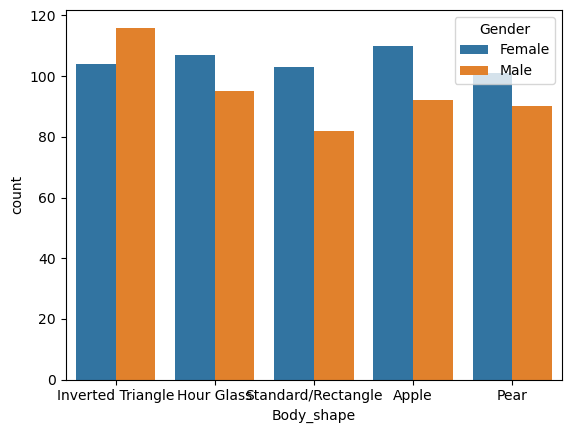

In [792]:
sns.countplot(data=df , x='Body_shape' , hue='Gender')

(array([ 98., 108.,  86., 101., 101.,  95.,  86.,  98.,  75., 152.]),
 array([58., 60., 62., 64., 66., 68., 70., 72., 74., 76., 78.]),
 <BarContainer object of 10 artists>)

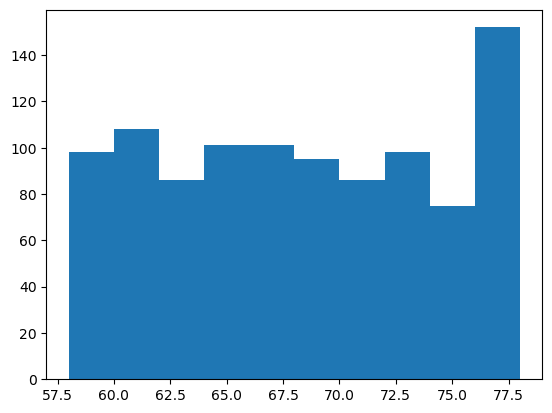

In [793]:
plt.hist(df['height_inch'])

non guassian distribution , let it remain the same way

(array([ 58., 119., 164., 174., 183., 124.,  64.,  66.,  30.,  18.]),
 array([ 41. ,  48.7,  56.4,  64.1,  71.8,  79.5,  87.2,  94.9, 102.6,
        110.3, 118. ]),
 <BarContainer object of 10 artists>)

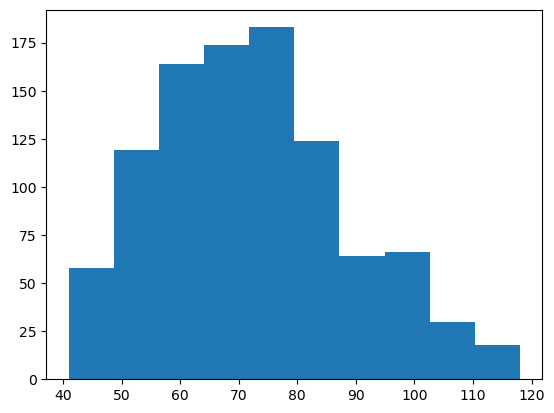

In [794]:
plt.hist(df['Weight'])

its skewed therefore we can make its guassian distribution by using log

(array([ 28.,  54.,  95., 122., 163., 186., 160.,  89.,  77.,  26.]),
 array([3.76120012, 3.86382928, 3.96645844, 4.0690876 , 4.17171677,
        4.27434593, 4.37697509, 4.47960425, 4.58223342, 4.68486258,
        4.78749174]),
 <BarContainer object of 10 artists>)

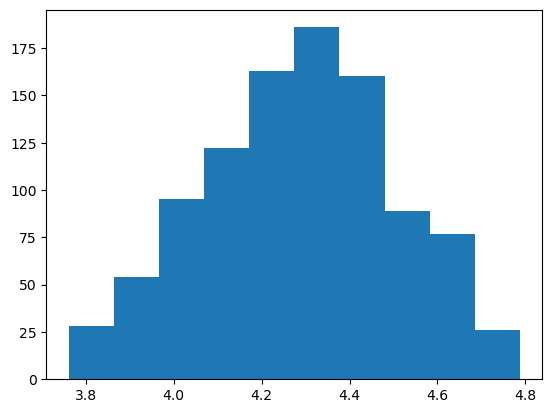

In [795]:
df['log_weight'] = np.log1p(df['Weight']+1) ## for standardisation
plt.hist(df['log_weight']) 

In [796]:
from sklearn.preprocessing import StandardScaler
xyz = StandardScaler().fit(X=np.array(df['log_weight']).reshape(-1, 1) )
df['log_weight_scaled'] = xyz.transform(np.array(df['log_weight']).reshape(-1, 1))


In [797]:
df['bmi']= np.round(df['Weight']/(2.53*df['height_inch']/100)**2 , 3)

In [798]:
df['bmi_box'] = df["bmi"]

In [799]:
sns.countplot(data=df , X="bmi"  , hue="Body Shape Index")

ValueError: Cannot use `hue` without `x` and `y`

In [ ]:
xt, _ = boxcox(df['bmi'])
plt.hist(xt)

In [ ]:
plt.hist(df['bmi'])

In [ ]:
scaler = MinMaxScaler()

# Fit the scaler to your data
scaler.fit(np.array(df["bmi"]).reshape(-1 , 1))

# Transform the data
df["bmi_scaled"] = scaler.transform(np.array(df["bmi"]).reshape(-1 , 1))

In [800]:
plt.hist(df["bmi_scaled"])

KeyError: 'bmi_scaled'

(array([107., 105., 162.,  92.,  83., 155.,  87., 116.,  42.,  51.]),
 array([28. , 30.4, 32.8, 35.2, 37.6, 40. , 42.4, 44.8, 47.2, 49.6, 52. ]),
 <BarContainer object of 10 artists>)

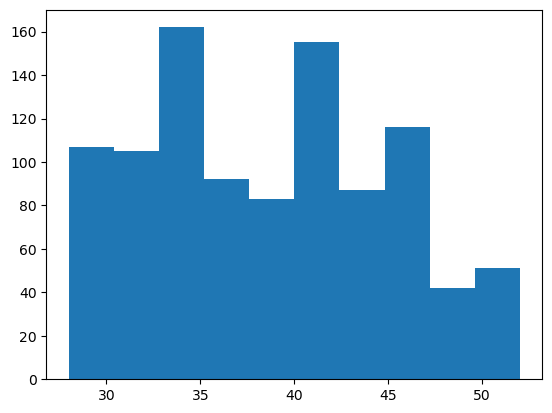

In [801]:
plt.hist(df["Bust/Chest"])

In [802]:
df["bc"] = np.sqrt(df["Bust/Chest"])

(array([107., 105., 113.,  97., 127., 107., 135.,  87.,  71.,  51.]),
 array([5.29150262, 5.48346262, 5.67542261, 5.8673826 , 6.05934259,
        6.25130259, 6.44326258, 6.63522257, 6.82718257, 7.01914256,
        7.21110255]),
 <BarContainer object of 10 artists>)

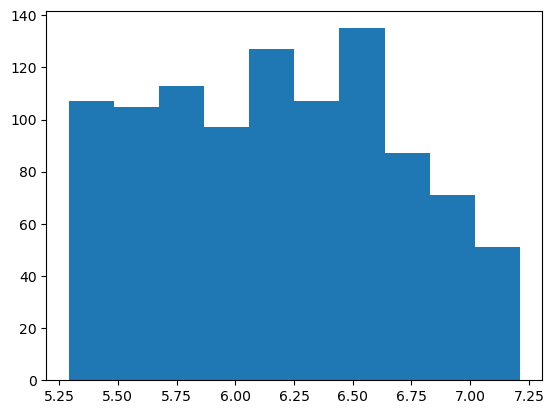

In [803]:
plt.hist(df["bc"])

In [804]:
df["b/w"] = df["Bust/Chest"]/df["Waist"]

(array([ 27.,  75., 116., 154., 207., 165., 120.,  81.,  39.,  16.]),
 array([-0.43721381, -0.31547657, -0.19373933, -0.0720021 ,  0.04973514,
         0.17147238,  0.29320961,  0.41494685,  0.53668408,  0.65842132,
         0.78015856]),
 <BarContainer object of 10 artists>)

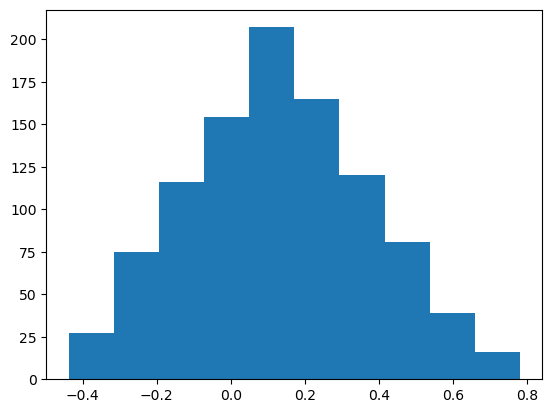

In [805]:
plt.hist(np.log(df["b/w"]))

In [806]:
xyz = StandardScaler().fit(X=np.array(df['b/w']).reshape(-1, 1) )
df['b/w_scaled'] = xyz.transform(np.array(df['b/w']).reshape(-1, 1))


normalised

In [807]:
df.drop("Cup Size" , inplace=True , axis=1) ## cupsize will add bias and noise toward femalw since it hold no significance for males

(array([ 79., 113.,  89., 139., 105., 153., 146.,  87.,  51.,  38.]),
 array([22. , 24.6, 27.2, 29.8, 32.4, 35. , 37.6, 40.2, 42.8, 45.4, 48. ]),
 <BarContainer object of 10 artists>)

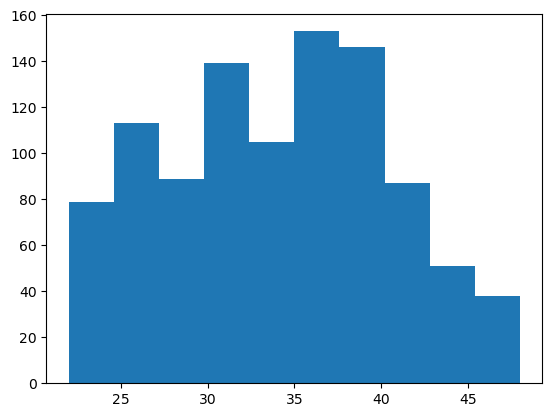

In [808]:
plt.hist((df['Waist']))


(array([ 56.,  45.,  91., 132.,  96., 161., 144., 151.,  71.,  53.]),
 array([3.13549422, 3.21112682, 3.28675943, 3.36239204, 3.43802465,
        3.51365726, 3.58928987, 3.66492247, 3.74055508, 3.81618769,
        3.8918203 ]),
 <BarContainer object of 10 artists>)

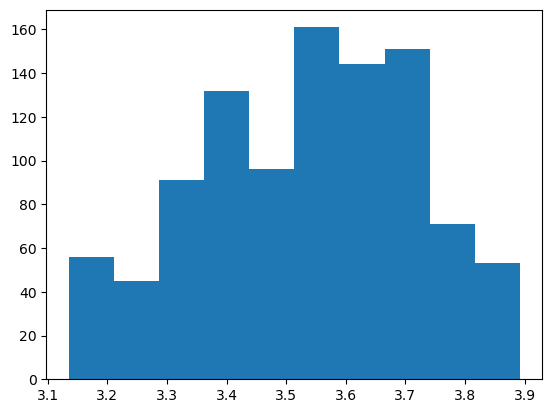

In [809]:
plt.hist(np.log1p(df['Waist']))

In [810]:
xyz = StandardScaler().fit(X=np.array(df['Waist']).reshape(-1, 1) )
df['waist_scaled'] = xyz.transform(np.array(df['Waist']).reshape(-1, 1))


(array([ 21.,  43.,  75., 102.,  84., 136., 138., 149., 137., 115.]),
 array([22. , 24.8, 27.6, 30.4, 33.2, 36. , 38.8, 41.6, 44.4, 47.2, 50. ]),
 <BarContainer object of 10 artists>)

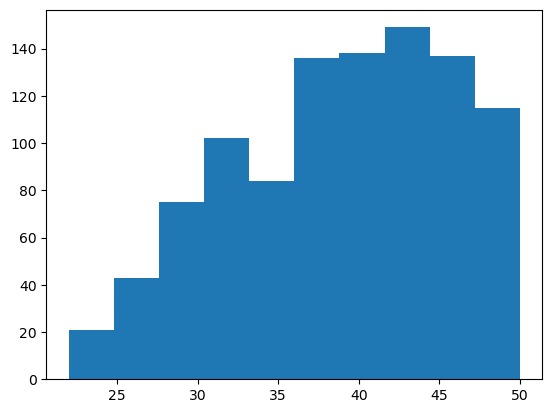

In [811]:
plt.hist(df["Hips"])

In [812]:
df["w/h"] = df["Hips"]/df["WA"]

KeyError: 'WA'

In [813]:
plt.hist(df["w/h"])

KeyError: 'w/h'

(array([ 25.,  62.,  99., 127., 170., 184., 119., 111.,  62.,  41.]),
 array([-0.44019415, -0.36319603, -0.28619791, -0.2091998 , -0.13220168,
        -0.05520356,  0.02179456,  0.09879268,  0.17579079,  0.25278891,
         0.32978703]),
 <BarContainer object of 10 artists>)

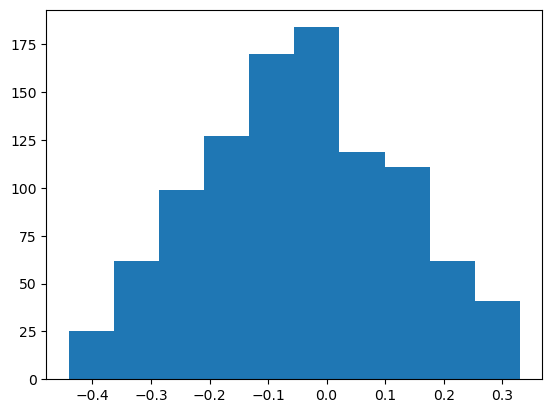

In [814]:
df["hi/wt"] = df["height_inch"]/df["Weight"]
xt , _ = boxcox(df["hi/wt"])
plt.hist(xt)

In [815]:
df["boc_cox_ht/wt"]=xt
xyz = StandardScaler().fit(X=np.array(df['boc_cox_ht/wt']).reshape(-1, 1) )
df['boc_cox_ht/wt_scaled'] = xyz.transform(np.array(df['boc_cox_ht/wt']).reshape(-1, 1))

In [816]:
x , _= boxcox(df["w/h"])
plt.hist(x)

KeyError: 'w/h'

C:\conda_tmp\ipykernel_34100\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

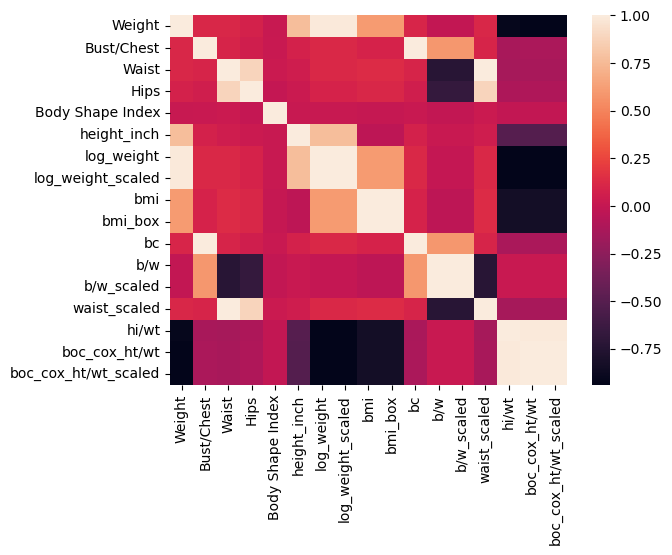

In [817]:
sns.heatmap(df.corr())

In [819]:
## we have relation of hiips and waist and height and log_weight
df['G'] = df['Gender'].map({"Male":0 , "Female":1})
 

In [820]:
df["G"]

0      1
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    0
998    1
999    0
Name: G, Length: 1000, dtype: int64

In [821]:
df["w/h"] = df["Waist"]/df["Hips"]

In [822]:
from sklearn.model_selection import train_test_split

X=df[[  'Hips' , 'w/h' , 'Waist' , 'b/w_scaled' , "hi/wt" , 'log_weight_scaled'  , "bmi_box" , 'G'   ]]
y = df["Body Shape Index"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [823]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , accuracy_score

In [171]:
model = GradientBoostingClassifier()


In [172]:
model.fit(X_train ,y_train)

GradientBoostingClassifier()

In [173]:
y_pred = model.predict(X_test)

In [174]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
acc = accuracy_score(y_test, y_pred)
print("acc:", acc)

Mean Squared Error: 3.385
acc: 0.195


In [175]:
from sklearn.metrics import f1_score, confusion_matrix


f1 = f1_score(y_test, y_pred , average=None)
print("F1 Score:", f1)


cm = confusion_matrix(y_test, y_pred )
print("Confusion Matrix:\n", cm)

F1 Score: [0.15625    0.13333333 0.20779221 0.18604651 0.26530612]
Confusion Matrix:
 [[ 5 12  1  6  6]
 [ 6  5  8 10  6]
 [11 10  8  8  8]
 [ 7  5  5  8 14]
 [ 5  8 10 15 13]]


In [176]:



scaler = MinMaxScaler()

scaler.fit(X=np.array(df['bmi']).reshape(-1, 1) )

df["bmi_scaled"] = scaler.transform(X=np.array(df['bmi']).reshape(-1, 1) )

In [177]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay






In [183]:
from sklearn.metrics import f1_score, confusion_matrix



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [826]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [827]:

numeric_features = X_train
numeric_features.head()
tf.convert_to_tensor(numeric_features)

<tf.Tensor: shape=(800, 8), dtype=float64, numpy=
array([[37.        ,  0.89189189, 33.        , ...,  2.0876338 ,
        29.017     ,  1.        ],
       [47.        ,  0.80851064, 38.        , ...,  1.40643775,
        29.232     ,  0.        ],
       [46.        ,  0.82608696, 38.        , ..., -0.79542751,
        18.811     ,  0.        ],
       ...,
       [42.        ,  0.78571429, 33.        , ...,  1.71708518,
        29.671     ,  1.        ],
       [25.        ,  0.96      , 24.        , ..., -0.43721106,
        20.405     ,  1.        ],
       [42.        ,  1.        , 42.        , ...,  0.14404696,
        26.181     ,  1.        ]])>

In [828]:
target = y_train
tf.convert_to_tensor(target)

<tf.Tensor: shape=(800,), dtype=int64, numpy=
array([2, 0, 0, 0, 3, 3, 3, 1, 1, 1, 0, 2, 2, 1, 0, 4, 0, 2, 1, 4, 0, 2,
       1, 3, 1, 4, 4, 3, 0, 0, 2, 4, 4, 2, 1, 3, 2, 0, 4, 0, 4, 3, 1, 1,
       2, 3, 4, 2, 2, 3, 0, 3, 4, 3, 2, 1, 0, 2, 2, 0, 0, 4, 4, 2, 0, 2,
       4, 4, 2, 4, 2, 2, 3, 3, 2, 4, 1, 3, 4, 1, 3, 3, 0, 4, 4, 1, 2, 1,
       3, 2, 4, 3, 2, 0, 2, 1, 2, 4, 3, 1, 3, 2, 0, 0, 4, 1, 3, 4, 0, 4,
       2, 1, 0, 2, 0, 4, 4, 4, 1, 2, 4, 4, 3, 4, 3, 1, 4, 0, 3, 1, 4, 0,
       4, 4, 4, 4, 4, 3, 2, 3, 4, 2, 0, 4, 0, 0, 3, 1, 2, 0, 3, 3, 1, 4,
       1, 3, 3, 0, 4, 4, 4, 0, 1, 2, 2, 4, 0, 1, 1, 2, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 1, 2, 3, 1, 1, 4, 3, 1, 3, 2, 1, 0, 1, 3, 4, 0, 3, 3, 3,
       2, 2, 4, 2, 4, 4, 2, 1, 4, 0, 1, 0, 3, 3, 0, 2, 4, 0, 1, 0, 0, 0,
       1, 0, 4, 1, 1, 2, 0, 0, 1, 2, 1, 3, 4, 1, 0, 4, 1, 0, 3, 1, 4, 3,
       0, 1, 1, 1, 3, 2, 1, 0, 4, 4, 2, 2, 3, 2, 1, 2, 4, 1, 2, 0, 0, 3,
       2, 2, 3, 2, 1, 4, 0, 2, 4, 3, 4, 3, 0, 0, 0, 0, 4, 2, 3, 3, 4, 3,
     

In [829]:

from sklearn.preprocessing import LabelEncoder

In [830]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)



In [831]:
target = tf.keras.utils.to_categorical(y_train)

In [832]:
import keras

In [833]:
y_test = tf.keras.utils.to_categorical(y_test)

In [834]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(numeric_features))

In [835]:
METRICS = [
      keras.metrics.CategoricalCrossentropy(name='cross entropy'),  # same as model's loss
      keras.metrics.MeanSquaredError(name='Brier score'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.F1Score(name="f1") , 
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [836]:
class_counts = np.bincount(y_train)
class_weights = {i: 1.0 / count for i, count in enumerate(class_counts)}

In [1111]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(20, activation='relu'), ##20 , 15 is the best  , accuracy - 10
    tf.keras.layers.Dropout(0.5)  , 
   
    tf.keras.layers.Dense(5 , activation='softmax')
  ])

  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
                loss="categorical_crossentropy",
                metrics=METRICS )
  return model

In [1112]:
model = get_basic_model()
history = model.fit(numeric_features , target , validation_data=(X_test , y_test)  , epochs=200  , batch_size=64 )

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - Brier score: 0.1684 - accuracy: 0.2257 - auc: 0.5161 - cross entropy: 1.7372 - f1: 0.2081 - fn: 651.5714 - fp: 56.0000 - loss: 1.7883 - prc: 0.2198 - precision: 0.2683 - recall: 0.0297 - tn: 2627.4285 - tp: 19.2857 - val_Brier score: 0.1634 - val_accuracy: 0.1700 - val_auc: 0.4810 - val_cross entropy: 1.6535 - val_f1: 0.1659 - val_fn: 200.0000 - val_fp: 0.0000e+00 - val_loss: 1.6535 - val_prc: 0.1949 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tn: 800.0000 - val_tp: 0.0000e+00
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Brier score: 0.1638 - accuracy: 0.2196 - auc: 0.5309 - cross entropy: 1.6630 - f1: 0.2074 - fn: 467.3571 - fp: 9.3571 - loss: 1.6630 - prc: 0.2193 - precision: 0.2527 - recall: 0.0074 - tn: 1874.0714 - tp: 3.5000 - val_Brier score: 0.1611 - val_accuracy: 0.1850 - val_auc: 0.5023 - val_cross entropy: 1.6244 - val_f1: 0.1687 - val_fn: 200.0000 - val_fp: 0.0000e+00 - val_loss: 1.6244 - val_prc: 0

In [1113]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Brier score: 0.1624 - accuracy: 0.2260 - auc: 0.4948 - cross entropy: 1.6561 - f1: 0.2146 - fn: 132.1250 - fp: 0.0000e+00 - loss: 1.6561 - prc: 0.2315 - precision: 1.0000 - recall: 0.0177 - tn: 536.0000 - tp: 1.8750


[1.6509910821914673,
 1.6509910821914673,
 0.1624208390712738,
 2.0,
 0.0,
 800.0,
 198.0,
 0.22499999403953552,
 1.0,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([0.08695648, 0.2954545 , 0.231884  , 0.14893614, 0.2912621 ],
       dtype=float32)>,
 0.009999999776482582,
 0.4975312352180481,
 0.21966376900672913]

In [1114]:
yhat = model.predict(X_test)
yhat = yhat.round()
acc = accuracy_score(y_test, yhat)
print(acc)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
0.01


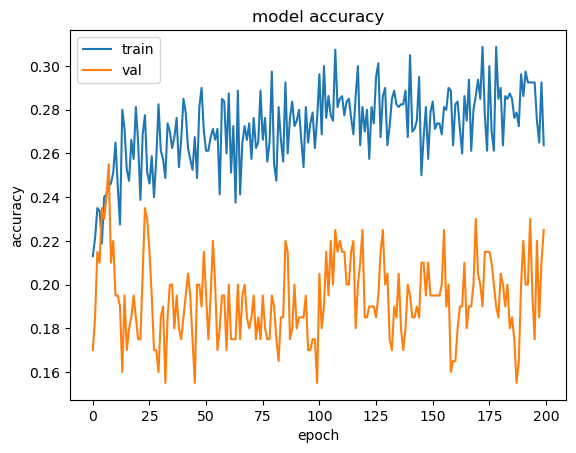

In [1115]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

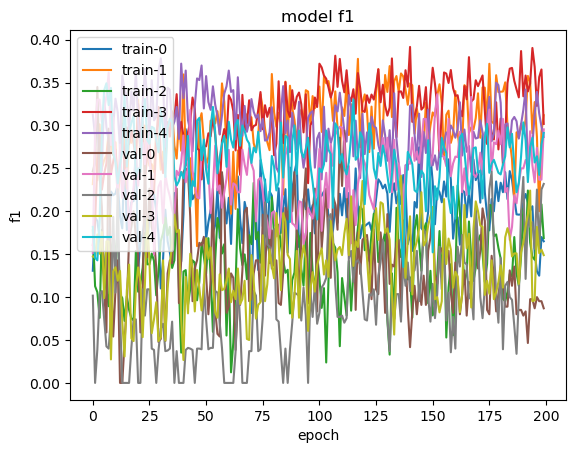

In [1116]:
plt.plot(history.history['f1'])
plt.plot(history.history['val_f1'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train-0' , 'train-1' , 'train-2', 'train-3',  'train-4', 'val-0' , 'val-1' , 'val-2' , 'val-3' , 'val-4'], loc='upper left')
plt.show()

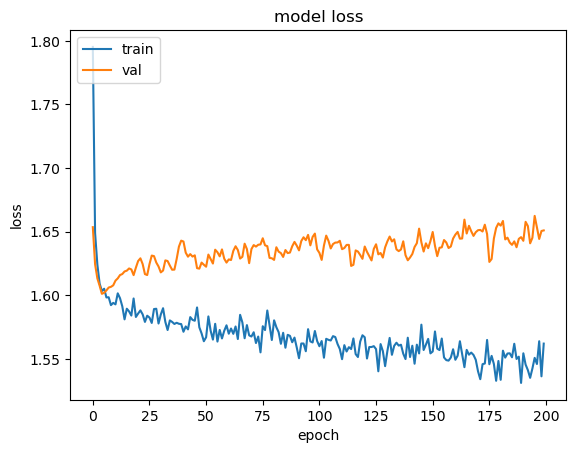

In [1117]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [1118]:
y=model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step


In [1119]:
predicted_classes = [np.argmax(sample) for sample in y]

In [1120]:
abc=[]
for i in y_test:
    for idx in range(0 ,5):
        if(i[idx]==1):
            abc.append(idx)

Confusion Matrix:
 [[ 2  2  6  7 13]
 [ 3 13  1 11  7]
 [ 6  9  8 13  9]
 [ 4 15  5  7  8]
 [ 1 14  4 17 15]]


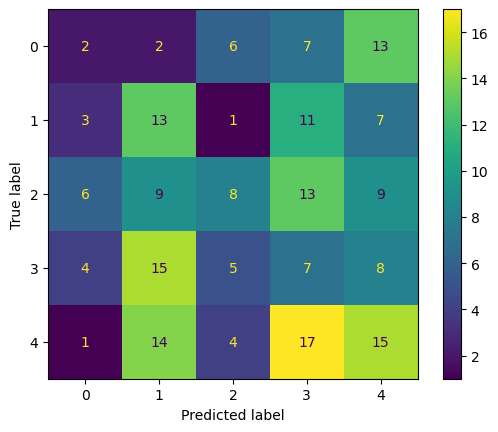

In [1121]:

cm = confusion_matrix(abc, predicted_classes )
print("Confusion Matrix:\n", cm)
    
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1 , 2 , 3 , 4])
disp.plot()